In [ ]:
pip install matplotlib

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns

In [3]:
data = pd.read_csv('stocks.csv')
data

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [39]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.to_period('M')
frequency_table = data.groupby(['Month', 'Ticker']).size().reset_index(name='Count')

print(frequency_table)

      Month Ticker  Count
0   2023-02   AAPL     15
1   2023-02   GOOG     15
2   2023-02   MSFT     15
3   2023-02   NFLX     15
4   2023-03   AAPL     23
5   2023-03   GOOG     23
6   2023-03   MSFT     23
7   2023-03   NFLX     23
8   2023-04   AAPL     19
9   2023-04   GOOG     19
10  2023-04   MSFT     19
11  2023-04   NFLX     19
12  2023-05   AAPL      5
13  2023-05   GOOG      5
14  2023-05   MSFT      5
15  2023-05   NFLX      5


In [4]:
print(data.isnull().values.any())

False


In [5]:
goog_data = data[data['Ticker'] == 'GOOG']
msft_data = data[data['Ticker'] == 'MSFT']

In [6]:
goog_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,100.381919,101.792516,99.262871,100.631532,100.631532,3.072537e+07
std,6.197598,6.229136,6.104003,6.279464,6.279464,1.422509e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,1.673200e+07
25%,94.532499,95.962498,93.548498,94.702501,94.702501,2.240618e+07
50%,102.680000,103.885002,101.235001,102.759998,102.759998,2.720520e+07
75%,105.859999,107.088249,104.729248,105.962503,105.962503,3.274350e+07
max,107.800003,109.629997,107.589996,109.459999,109.459999,9.779860e+07


In [8]:
msft_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,274.735969,277.764356,272.027741,275.039839,274.975182,3.084835e+07
std,17.324808,17.435444,17.360386,17.676231,17.705505,1.109188e+07
min,246.550003,250.929993,245.610001,246.270004,246.270004,1.715030e+07
25%,257.410004,260.357498,255.984997,258.742500,258.742500,2.339235e+07
50%,277.110001,280.835007,273.690002,275.810013,275.810013,2.734000e+07
75%,285.825005,289.044991,283.560005,287.217506,287.217506,3.432410e+07
max,307.760010,311.970001,305.149994,310.649994,310.649994,6.952740e+07


In [9]:
# Is there a significant correlation in the average high stock prices of Google and Microsoft over the period? Are they related? To determine
# this we will use a correlation test
# Null Hypothesis: There is no correlation in the average high stock prices of google and microsoft.
# Alternative Hypothesis: There is a significant correlation in the stock prices of google and microsoft.
goog_prices = goog_data['High']
msft_prices = msft_data['High']
goog_dates = goog_data['Date'] 
msft_dates = msft_data['Date']

In [11]:
correlation_results = sp.pearsonr(goog_prices, msft_prices)
print("Correlation Coefficient:\t", correlation_results[0])
print("P-value:\t\t\t", correlation_results[1])
# a p value of 0 means there is a significant relationship between the two variables
# Correlation Coefficient of 0.89 tells us there is a strong positive relationship between the two variables.
# This tells us as one stock goes up the other one is likely to go up.

Correlation Coefficient:	 0.8790340584750373
P-value:			 5.793548067034456e-21


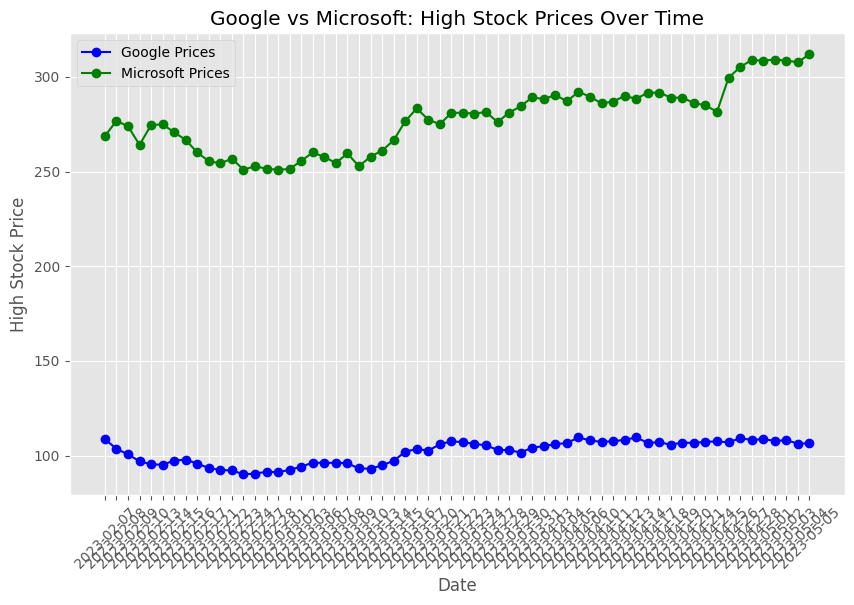

In [10]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.plot(goog_dates, goog_prices, label='Google Prices', color='blue', linestyle='-', marker='o')
plt.plot(msft_dates, msft_prices, label='Microsoft Prices', color='green', linestyle='-', marker='o')
plt.legend()
plt.xlabel('Date')
plt.ylabel('High Stock Price')
plt.title('Google vs Microsoft: High Stock Prices Over Time')
plt.xticks(rotation=45)
plt.show()

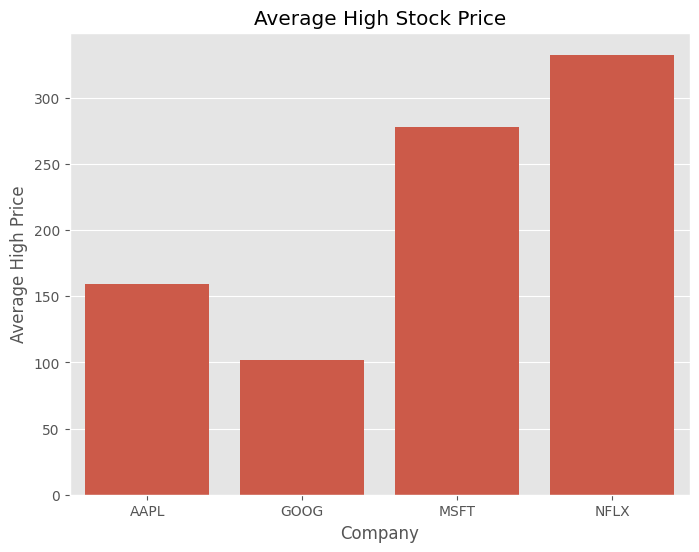

In [33]:
avg_high = data.groupby('Ticker')['High'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Ticker', y='High', data=avg_high)
plt.title('Average High Stock Price')
plt.xlabel('Company')
plt.ylabel('Average High Price')
plt.show()
